<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

DatabaseError: Execution failed on sql '
SELECT COUNT(*)
FROM master
': no such table: master

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [32]:
import sqlite3

def find_table_with_convertedcomp(sqlite_file):
    # Connect to the SQLite database
    conn = sqlite3.connect(sqlite_file)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()

    # Query to retrieve tables containing 'ConvertedComp' column
    query = "SELECT name FROM sqlite_master WHERE type='table' AND sql LIKE '%LanguageDesireNextYear%';"
    cursor.execute(query)

    # Fetch table names
    tables = cursor.fetchall()

    # Print tables containing 'ConvertedComp' column
    if tables:
        print("Tables containing 'LanguageDesireNextYear' column:")
        for table in tables:
            print(table[0])
    else:
        print("No tables found with 'LanguageDesireNextYear' column.")

    # Close the database connection
    conn.close()

# Replace 'your_database.sqlite' with the actual path to your SQLite database file
find_table_with_convertedcomp('C:\\Users\\Toshiba\\Downloads\\IBM_final\\m4_survey_data.sqlite')


Tables containing 'LanguageDesireNextYear' column:
LanguageDesireNextYear


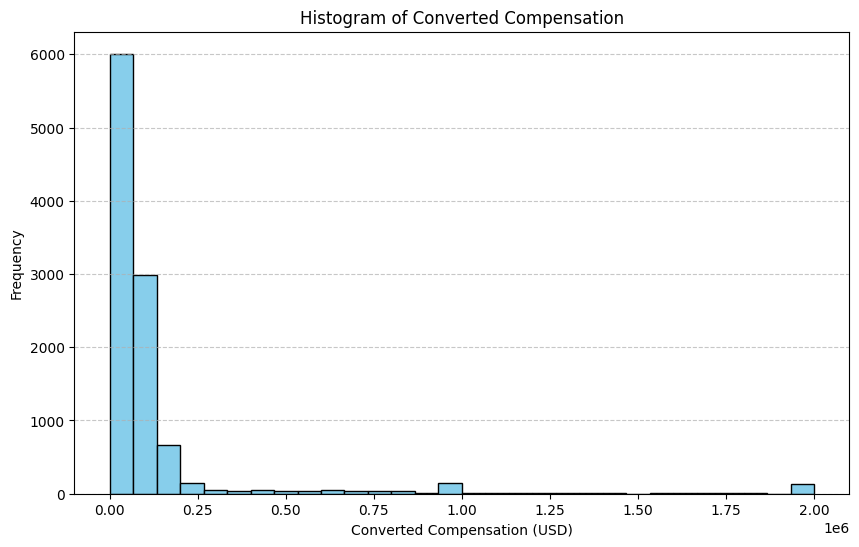

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram(sqlite_file):
    # Connect to the SQLite database
    conn = sqlite3.connect(sqlite_file)

    # Query to retrieve 'ConvertedComp' data
    query = "SELECT ConvertedComp FROM master"

    # Execute the query and fetch the data into a pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Close the database connection
    conn.close()

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Histogram of Converted Compensation')
    plt.xlabel('Converted Compensation (USD)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Replace 'your_database.sqlite' with the actual path to your SQLite database file
plot_histogram('C:\\Users\\Toshiba\\Downloads\\IBM_final\\m4_survey_data.sqlite')


### Box Plots


Plot a box plot of `Age.`


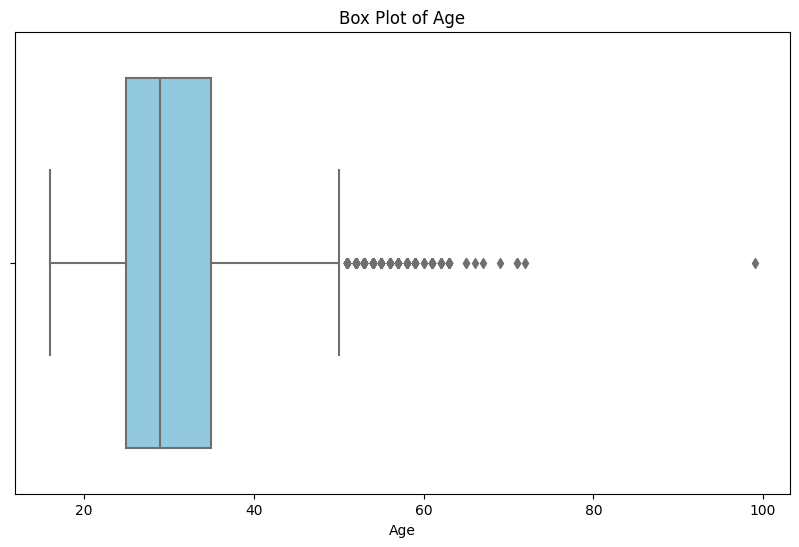

In [7]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_age(sqlite_file):
    # Connect to the SQLite database
    conn = sqlite3.connect(sqlite_file)

    # Query to retrieve 'Age' data
    query = "SELECT Age FROM master"

    # Execute the query and fetch the data into a pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Close the database connection
    conn.close()

    # Create a box plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Age'], color='skyblue')
    plt.title('Box Plot of Age')
    plt.xlabel('Age')
    plt.show()

# Replace 'your_database.sqlite' with the actual path to your SQLite database file
plot_boxplot_age('C:\\Users\\Toshiba\\Downloads\\IBM_final\\m4_survey_data.sqlite')



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


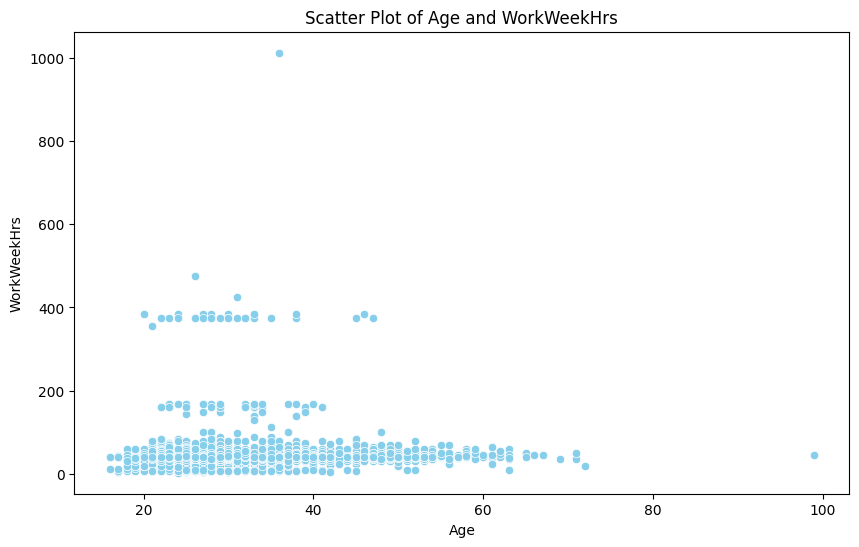

In [8]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot_age_workweekhrs(sqlite_file):
    # Connect to the SQLite database
    conn = sqlite3.connect(sqlite_file)

    # Query to retrieve 'Age' and 'WorkWeekHrs' data
    query = "SELECT Age, WorkWeekHrs FROM master WHERE Age NOT NULL AND WorkWeekHrs NOT NULL"

    # Execute the query and fetch the data into a pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Close the database connection
    conn.close()

    # Create a scatter plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='WorkWeekHrs', data=df, color='skyblue')
    plt.title('Scatter Plot of Age and WorkWeekHrs')
    plt.xlabel('Age')
    plt.ylabel('WorkWeekHrs')
    plt.show()

# Replace 'your_database.sqlite' with the actual path to your SQLite database file
scatter_plot_age_workweekhrs('C:\\Users\\Toshiba\\Downloads\\IBM_final\\m4_survey_data.sqlite')



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


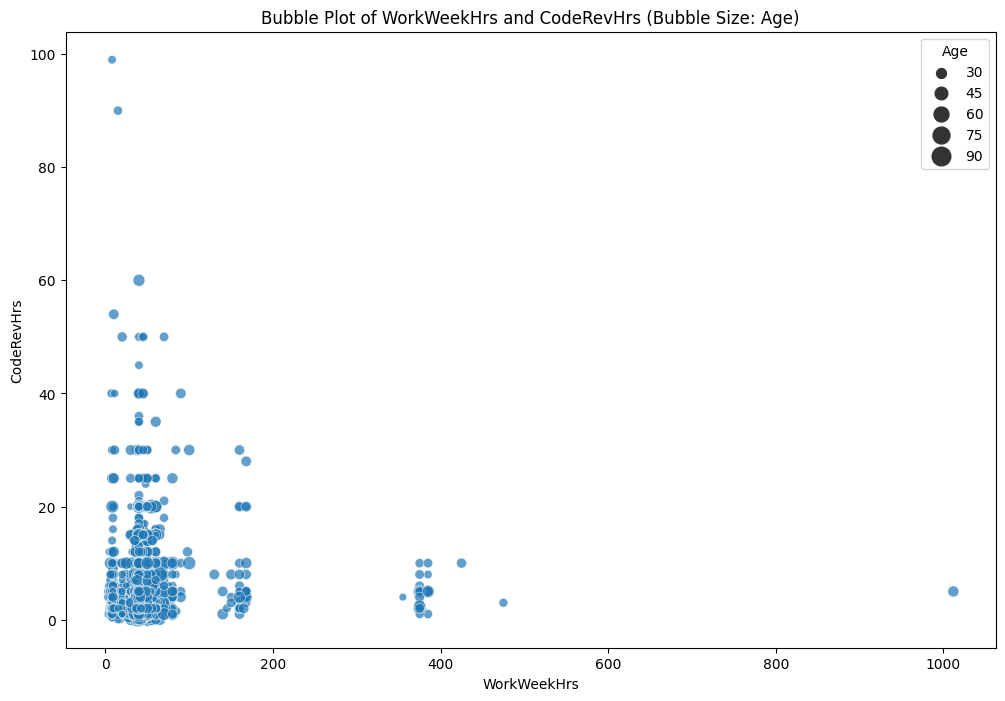

In [10]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def bubble_plot_workweekhrs_coderevhrs(sqlite_file):
    # Connect to the SQLite database
    conn = sqlite3.connect(sqlite_file)

    # Query to retrieve 'WorkWeekHrs', 'CodeRevHrs', and 'Age' data
    query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master WHERE WorkWeekHrs NOT NULL AND CodeRevHrs NOT NULL AND Age NOT NULL"

    # Execute the query and fetch the data into a pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Close the database connection
    conn.close()

    # Create a bubble plot using seaborn
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', data=df, sizes=(20, 200), alpha=0.7)
    plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs (Bubble Size: Age)')
    plt.xlabel('WorkWeekHrs')
    plt.ylabel('CodeRevHrs')
    plt.show()

# Replace 'your_database.sqlite' with the actual path to your SQLite database file
bubble_plot_workweekhrs_coderevhrs('C:\\Users\\Toshiba\\Downloads\\IBM_final\\m4_survey_data.sqlite')



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


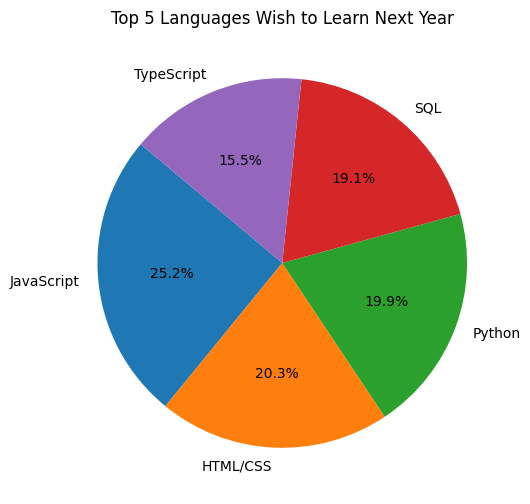

In [34]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def pie_chart_top_databases(sqlite_file):
    # Connect to the SQLite database
    conn = sqlite3.connect(sqlite_file)

    # Query to retrieve the top 5 databases respondents wish to learn next year
    query = """
    SELECT LanguageDesireNextYear, COUNT(LanguageDesireNextYear) as Count
    FROM LanguageDesireNextYear
    WHERE LanguageDesireNextYear IS NOT NULL
    GROUP BY LanguageDesireNextYear
    ORDER BY Count DESC
    LIMIT 5;
    """

    # Execute the query and fetch the data into a pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Close the database connection
    conn.close()

    # Create a pie chart using matplotlib
    plt.figure(figsize=(10, 6))
    plt.pie(df['Count'], labels=df['LanguageDesireNextYear'], autopct='%1.1f%%', startangle=140)
    plt.title('Top 5 Languages Wish to Learn Next Year')
    plt.show()

# Replace 'your_database.sqlite' with the actual path to your SQLite database file
pie_chart_top_databases('C:\\Users\\Toshiba\\Downloads\\IBM_final\\m4_survey_data.sqlite')



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


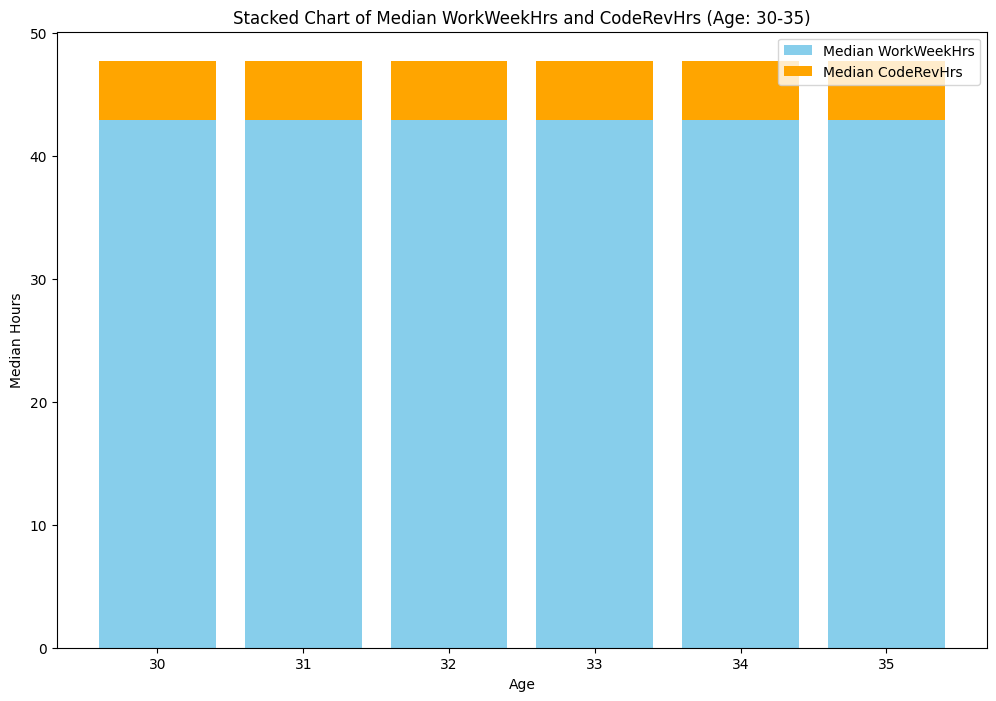

In [23]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def stacked_chart_median_workweekhrs_coderevhrs(sqlite_file):
    # Connect to the SQLite database
    conn = sqlite3.connect(sqlite_file)

    # Query to retrieve median 'WorkWeekHrs' and 'CodeRevHrs' for the age group 30 to 35
    query = """
    SELECT Age,
           (SELECT AVG(WorkWeekHrs) FROM master WHERE Age BETWEEN 30 AND 35) AS MedianWorkWeekHrs,
           (SELECT AVG(CodeRevHrs) FROM master WHERE Age BETWEEN 30 AND 35) AS MedianCodeRevHrs
    FROM master
    WHERE Age BETWEEN 30 AND 35
    GROUP BY Age
    """

    # Execute the query and fetch the data into a pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Close the database connection
    conn.close()

    # Create a stacked chart using matplotlib
    plt.figure(figsize=(12, 8))
    plt.bar(df['Age'], df['MedianWorkWeekHrs'], label='Median WorkWeekHrs', color='skyblue')
    plt.bar(df['Age'], df['MedianCodeRevHrs'], bottom=df['MedianWorkWeekHrs'], label='Median CodeRevHrs', color='orange')
    plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs (Age: 30-35)')
    plt.xlabel('Age')
    plt.ylabel('Median Hours')
    plt.legend()
    plt.show()
# Replace 'your_database.sqlite' with the actual path to your SQLite database file
stacked_chart_median_workweekhrs_coderevhrs('C:\\Users\\Toshiba\\Downloads\\IBM_final\\m4_survey_data.sqlite')



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


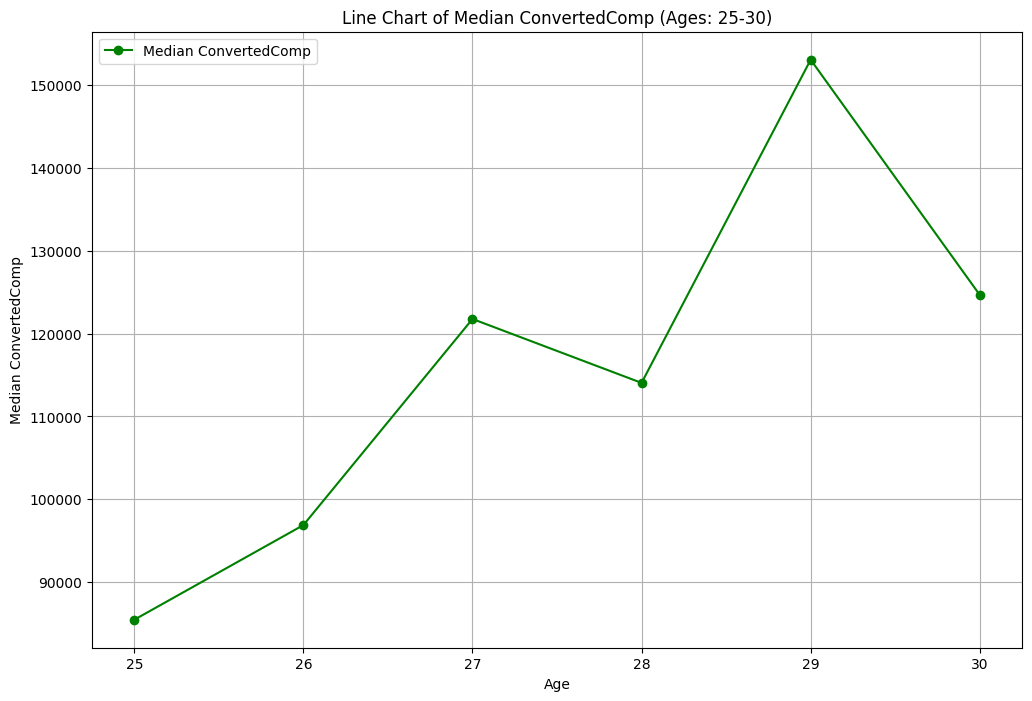

In [35]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def line_chart_median_convertedcomp(sqlite_file):
    # Connect to the SQLite database
    conn = sqlite3.connect(sqlite_file)

    # Query to retrieve median 'ConvertedComp' for ages from 45 to 60
    query = """
    SELECT Age,
           AVG(ConvertedComp) AS MedianConvertedComp
    FROM master
    WHERE Age BETWEEN 25 AND 30
    GROUP BY Age
    """

    # Execute the query and fetch the data into a pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Close the database connection
    conn.close()

    # Create a line chart using matplotlib
    plt.figure(figsize=(12, 8))
    plt.plot(df['Age'], df['MedianConvertedComp'], marker='o', color='green', label='Median ConvertedComp')
    plt.title('Line Chart of Median ConvertedComp (Ages: 25-30)')
    plt.xlabel('Age')
    plt.ylabel('Median ConvertedComp')
    plt.legend()
    plt.grid(True)
    plt.show()

# Replace 'your_database.sqlite' with the actual path to your SQLite database file
line_chart_median_convertedcomp('C:\\Users\\Toshiba\\Downloads\\IBM_final\\m4_survey_data.sqlite')



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


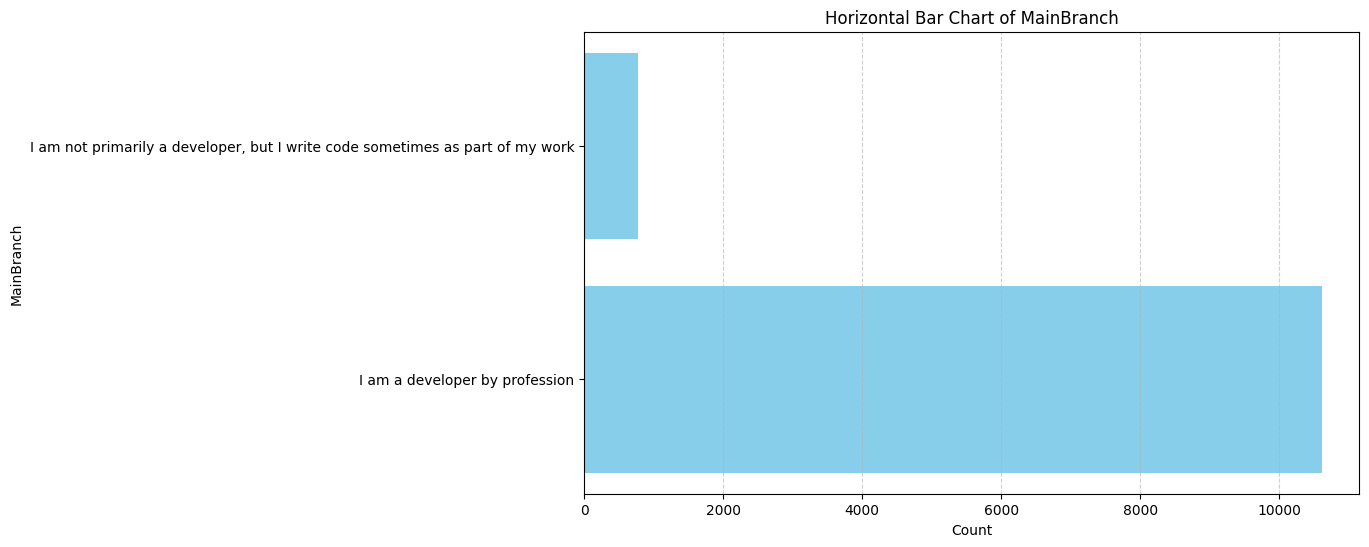

In [27]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def horizontal_bar_chart_main_branch(sqlite_file):
    # Connect to the SQLite database
    conn = sqlite3.connect(sqlite_file)

    # Query to retrieve the counts for each unique value in the 'MainBranch' column
    query = """
    SELECT MainBranch, COUNT(*) AS Count
    FROM master
    WHERE MainBranch IS NOT NULL
    GROUP BY MainBranch
    """

    # Execute the query and fetch the data into a pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Close the database connection
    conn.close()

    # Create a horizontal bar chart using matplotlib
    plt.figure(figsize=(10, 6))
    plt.barh(df['MainBranch'], df['Count'], color='skyblue')
    plt.title('Horizontal Bar Chart of MainBranch')
    plt.xlabel('Count')
    plt.ylabel('MainBranch')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

# Replace 'your_database.sqlite' with the actual path to your SQLite database file
horizontal_bar_chart_main_branch('C:\\Users\\Toshiba\\Downloads\\IBM_final\\m4_survey_data.sqlite')



Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
